In [ ]:
!pip install pyclustering

In [ ]:
#Downgrade the numpy version to 1.23.4 because pyclustering doesn't work with newer numpy version
!pip install numpy==1.23.4

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data_stunting.csv')
df.head(35)

,No,Nama,Lat,Lon,Pendapatan,Pendidikan,Akses_RS,Akses_Gizi,Kondisi_Lingkungan,Pemakaian_Air,Sanitasi
0,1,Nias,1.03111,97.69182,40,30,20,86,15,93,33
1,2,Mandailing Natal,0.77681,99.37472,40,30,40,67,20,98,3
2,3,Tapanuli Selatan,1.48318,99.23489,50,40,20,84,15,95,8
3,4,Tapanuli Tengah,1.88577,98.64414,40,20,50,98,9,68,20
4,5,Tapanuli Utara,1.99580,99.05289,40,20,40,100,20,99,7
5,6,Toba Samosir,2.38280,99.31009,30,20,50,44,28,89,2
6,7,Labuhan Batu,2.36032,100.13924,40,30,60,20,18,100,21
7,8,Asahan,2.82077,99.56210,40,20,40,67,20,99,28
8,9,Simalungun,2.99445,98.80198,40,30,40,68,18,99,52
9,10,Dairi,2.87100,98.20738,40,30,40,52,16,86,24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No                  33 non-null     int64  
 1   Nama                33 non-null     object 
 2   Lat                 33 non-null     float64
 3   Lon                 33 non-null     float64
 4   Pendapatan          33 non-null     int64  
 5   Pendidikan          33 non-null     int64  
 6   Akses_RS            33 non-null     int64  
 7   Akses_Gizi          33 non-null     int64  
 8   Kondisi_Lingkungan  33 non-null     int64  
 9   Pemakaian_Air       33 non-null     int64  
 10  Sanitasi            33 non-null     int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 3.0+ KB


In [ ]:
df.isnull().sum()

No                    0
Nama                  0
Lat                   0
Lon                   0
Pendapatan            0
Pendidikan            0
Akses_RS              0
Akses_Gizi            0
Kondisi_Lingkungan    0
Pemakaian_Air         0
Sanitasi              0
dtype: int64

Because the data seems okay, and there is no missing value, i will skip data preprocessing part

# EDA

In [ ]:
df.describe()

,No,Lat,Lon,Pendapatan,Pendidikan,Akses_RS,Akses_Gizi,Kondisi_Lingkungan,Pemakaian_Air,Sanitasi
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,17.00000,2.282247,98.874814,45.606061,34.545455,42.121212,67.666667,28.363636,94.606061,28.757576
std,9.66954,0.916639,0.753952,14.564382,14.596855,18.834406,23.431638,22.063570,6.995264,17.748293
min,1.00000,0.663250,97.513720,30.000000,20.000000,0.000000,6.000000,8.000000,68.000000,2.000000
25%,9.00000,1.483180,98.502230,40.000000,30.000000,30.000000,54.000000,13.000000,93.000000,10.000000
50%,17.00000,2.382800,98.801980,40.000000,30.000000,40.000000,67.000000,20.000000,98.000000,28.000000
75%,25.00000,2.994450,99.374720,50.000000,40.000000,50.000000,86.000000,30.000000,99.000000,44.000000
max,33.00000,3.743450,100.236200,100.000000,80.000000,80.000000,100.000000,80.000000,100.000000,66.000000


In [ ]:
# Select only numerical column for clustering
numerical_cols = ['Pendapatan', 'Pendidikan', 'Akses_RS', 'Akses_Gizi', 'Kondisi_Lingkungan', 'Pemakaian_Air', 'Sanitasi']  # Replace with your actual numerical column names
numerical_data = df[numerical_cols]
numerical_data.head()

,Pendapatan,Pendidikan,Akses_RS,Akses_Gizi,Kondisi_Lingkungan,Pemakaian_Air,Sanitasi
0,40,30,20,86,15,93,33
1,40,30,40,67,20,98,3
2,50,40,20,84,15,95,8
3,40,20,50,98,9,68,20
4,40,20,40,100,20,99,7


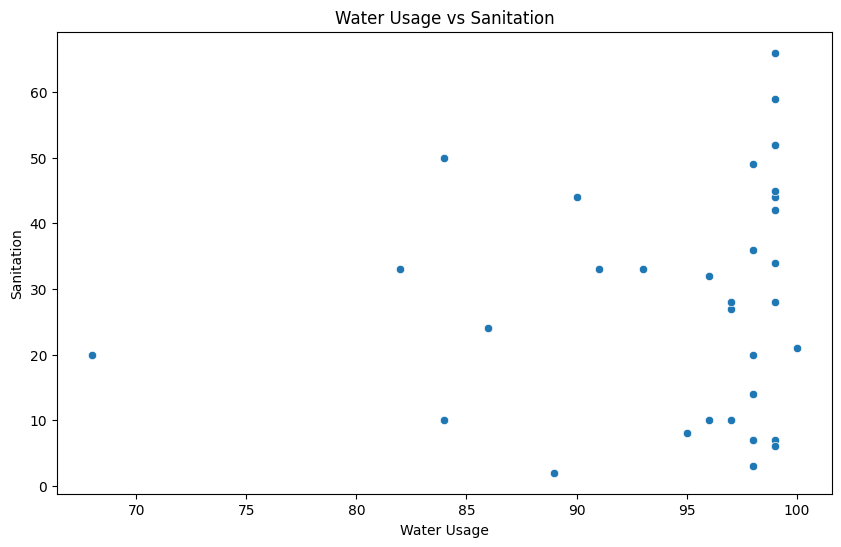

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Pemakaian_Air', y='Sanitasi')
plt.title('Water Usage vs Sanitation')
plt.xlabel('Water Usage')
plt.ylabel('Sanitation')
plt.show()

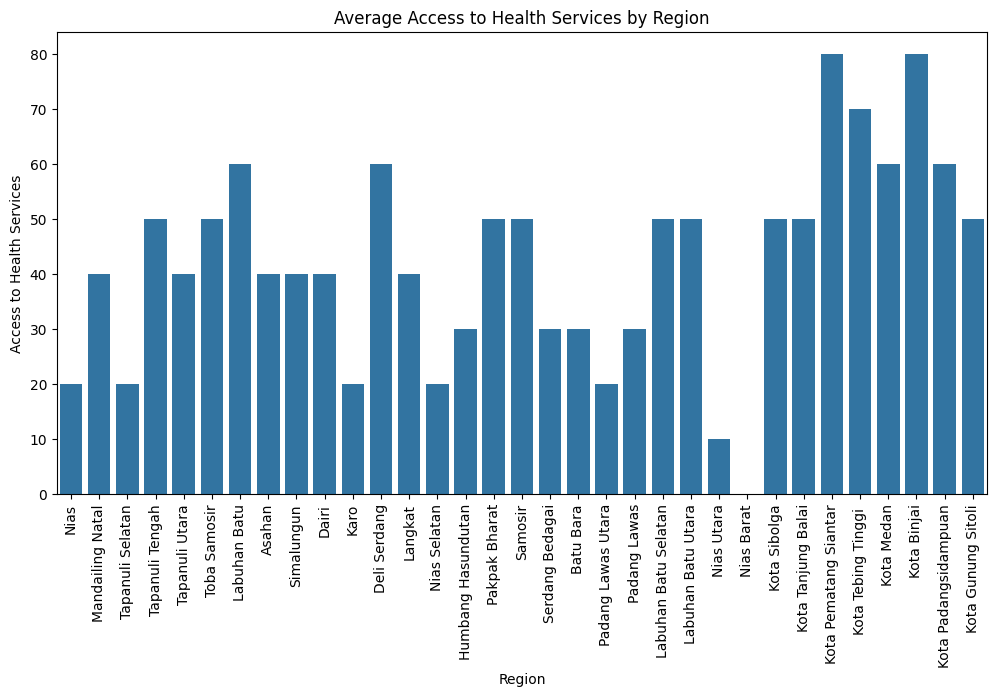

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Nama', y='Akses_RS')
plt.title('Average Access to Health Services by Region')
plt.xlabel('Region')
plt.ylabel('Access to Health Services')
plt.xticks(rotation=90)
plt.show()

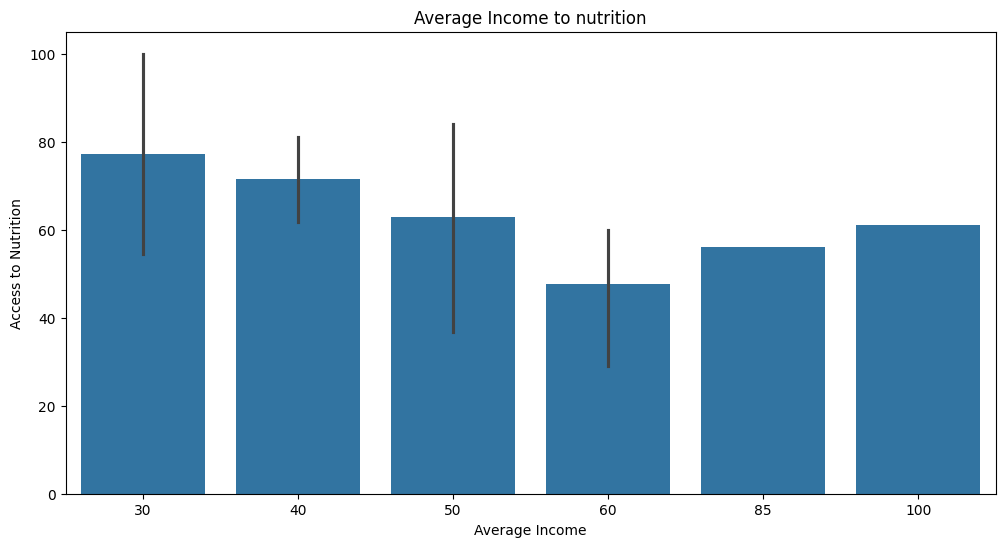

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Pendapatan', y='Akses_Gizi')
plt.title('Average Income to nutrition')
plt.xlabel('Average Income')
plt.ylabel('Access to Nutrition')
#plt.xticks(rotation=90)
plt.show()

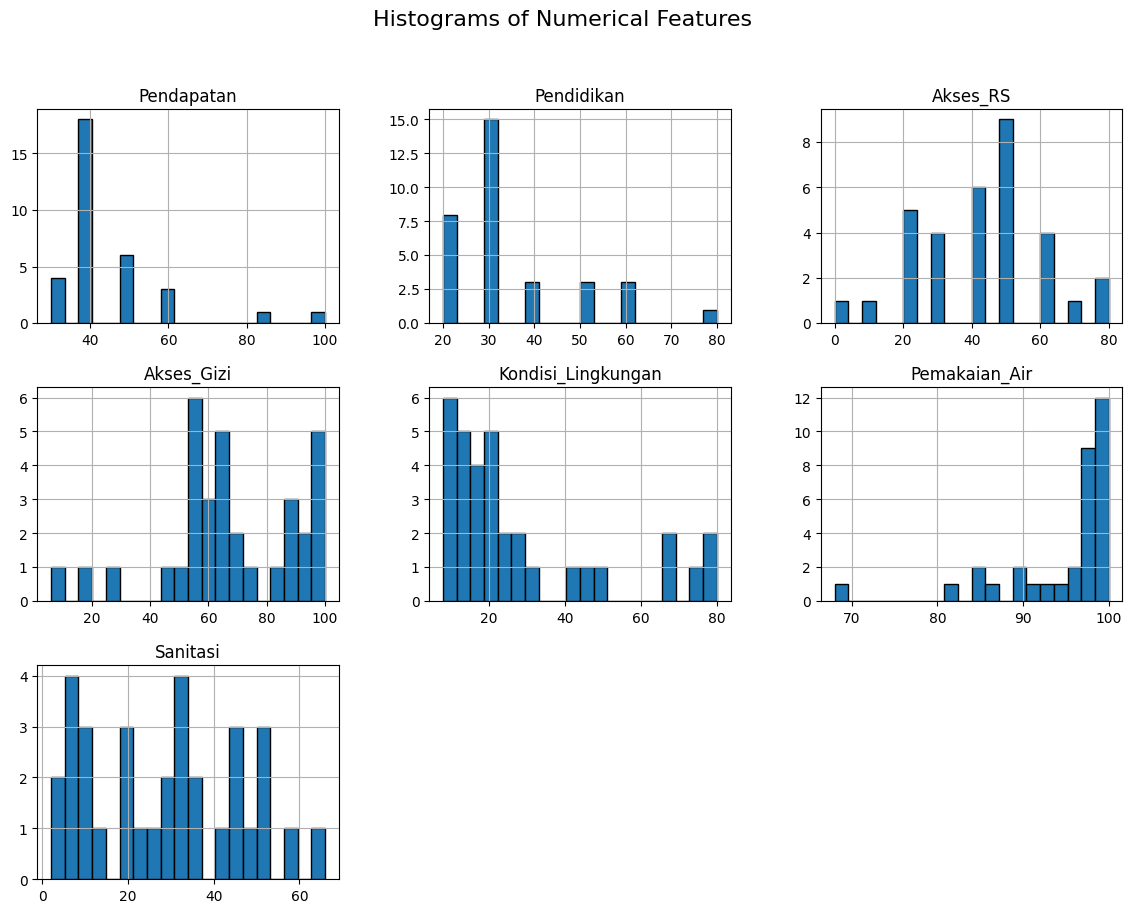

In [ ]:
# Histogram for numerical features
num_features = ['Pendapatan', 'Pendidikan', 'Akses_RS', 'Akses_Gizi', 'Kondisi_Lingkungan', 'Pemakaian_Air', 'Sanitasi']
df[num_features].hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

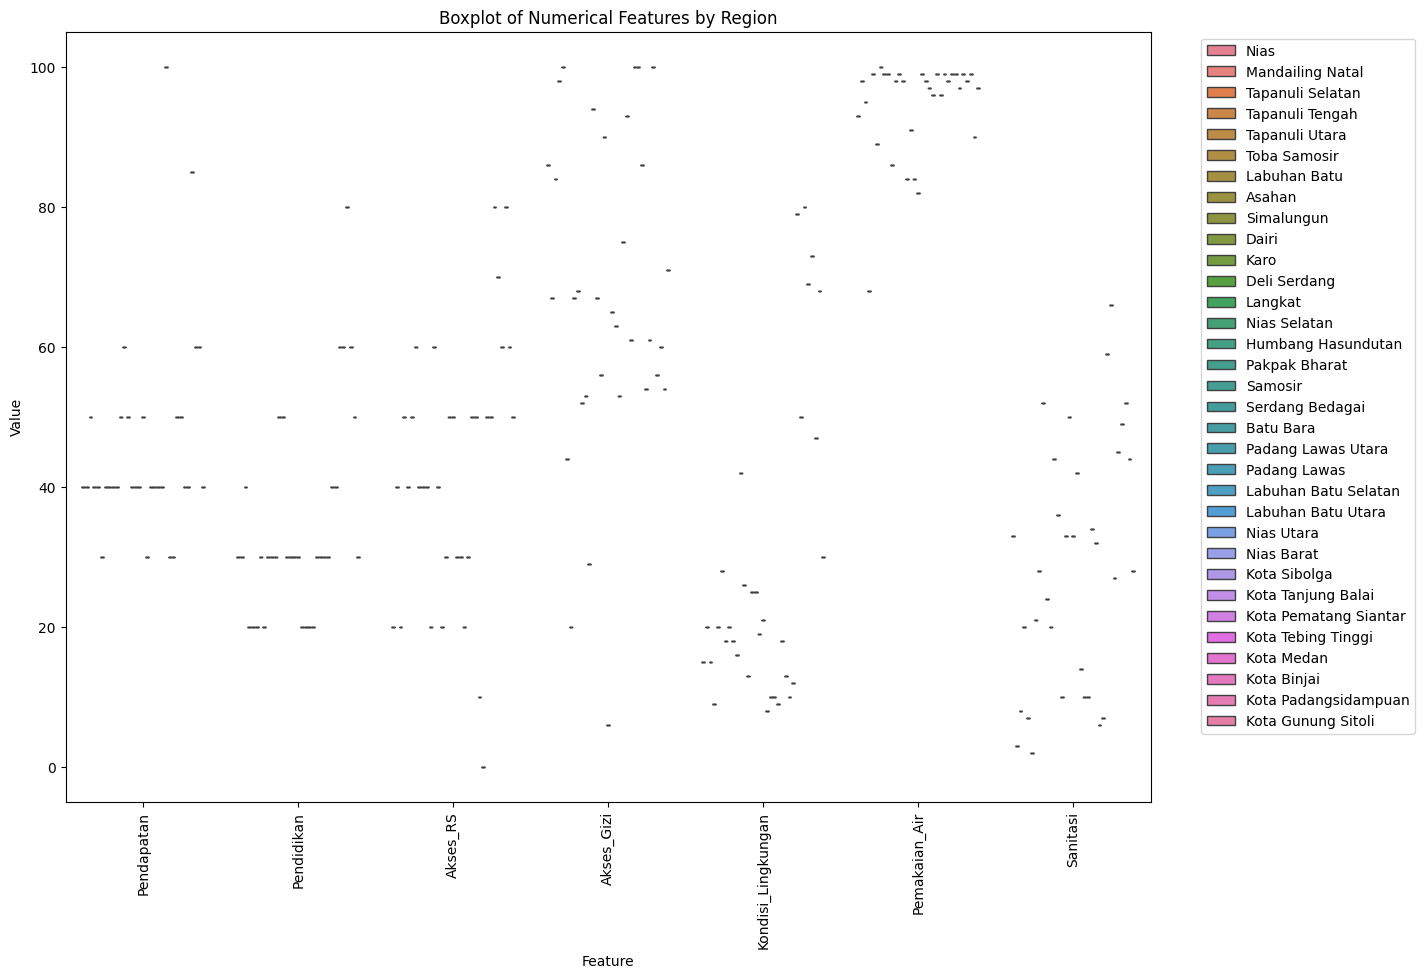

In [ ]:
# Boxplot for numerical features by region
plt.figure(figsize=(14, 10))
sns.boxplot(data=df.melt(id_vars=['Nama'], value_vars=num_features), x='variable', y='value', hue='Nama')
plt.title('Boxplot of Numerical Features by Region')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

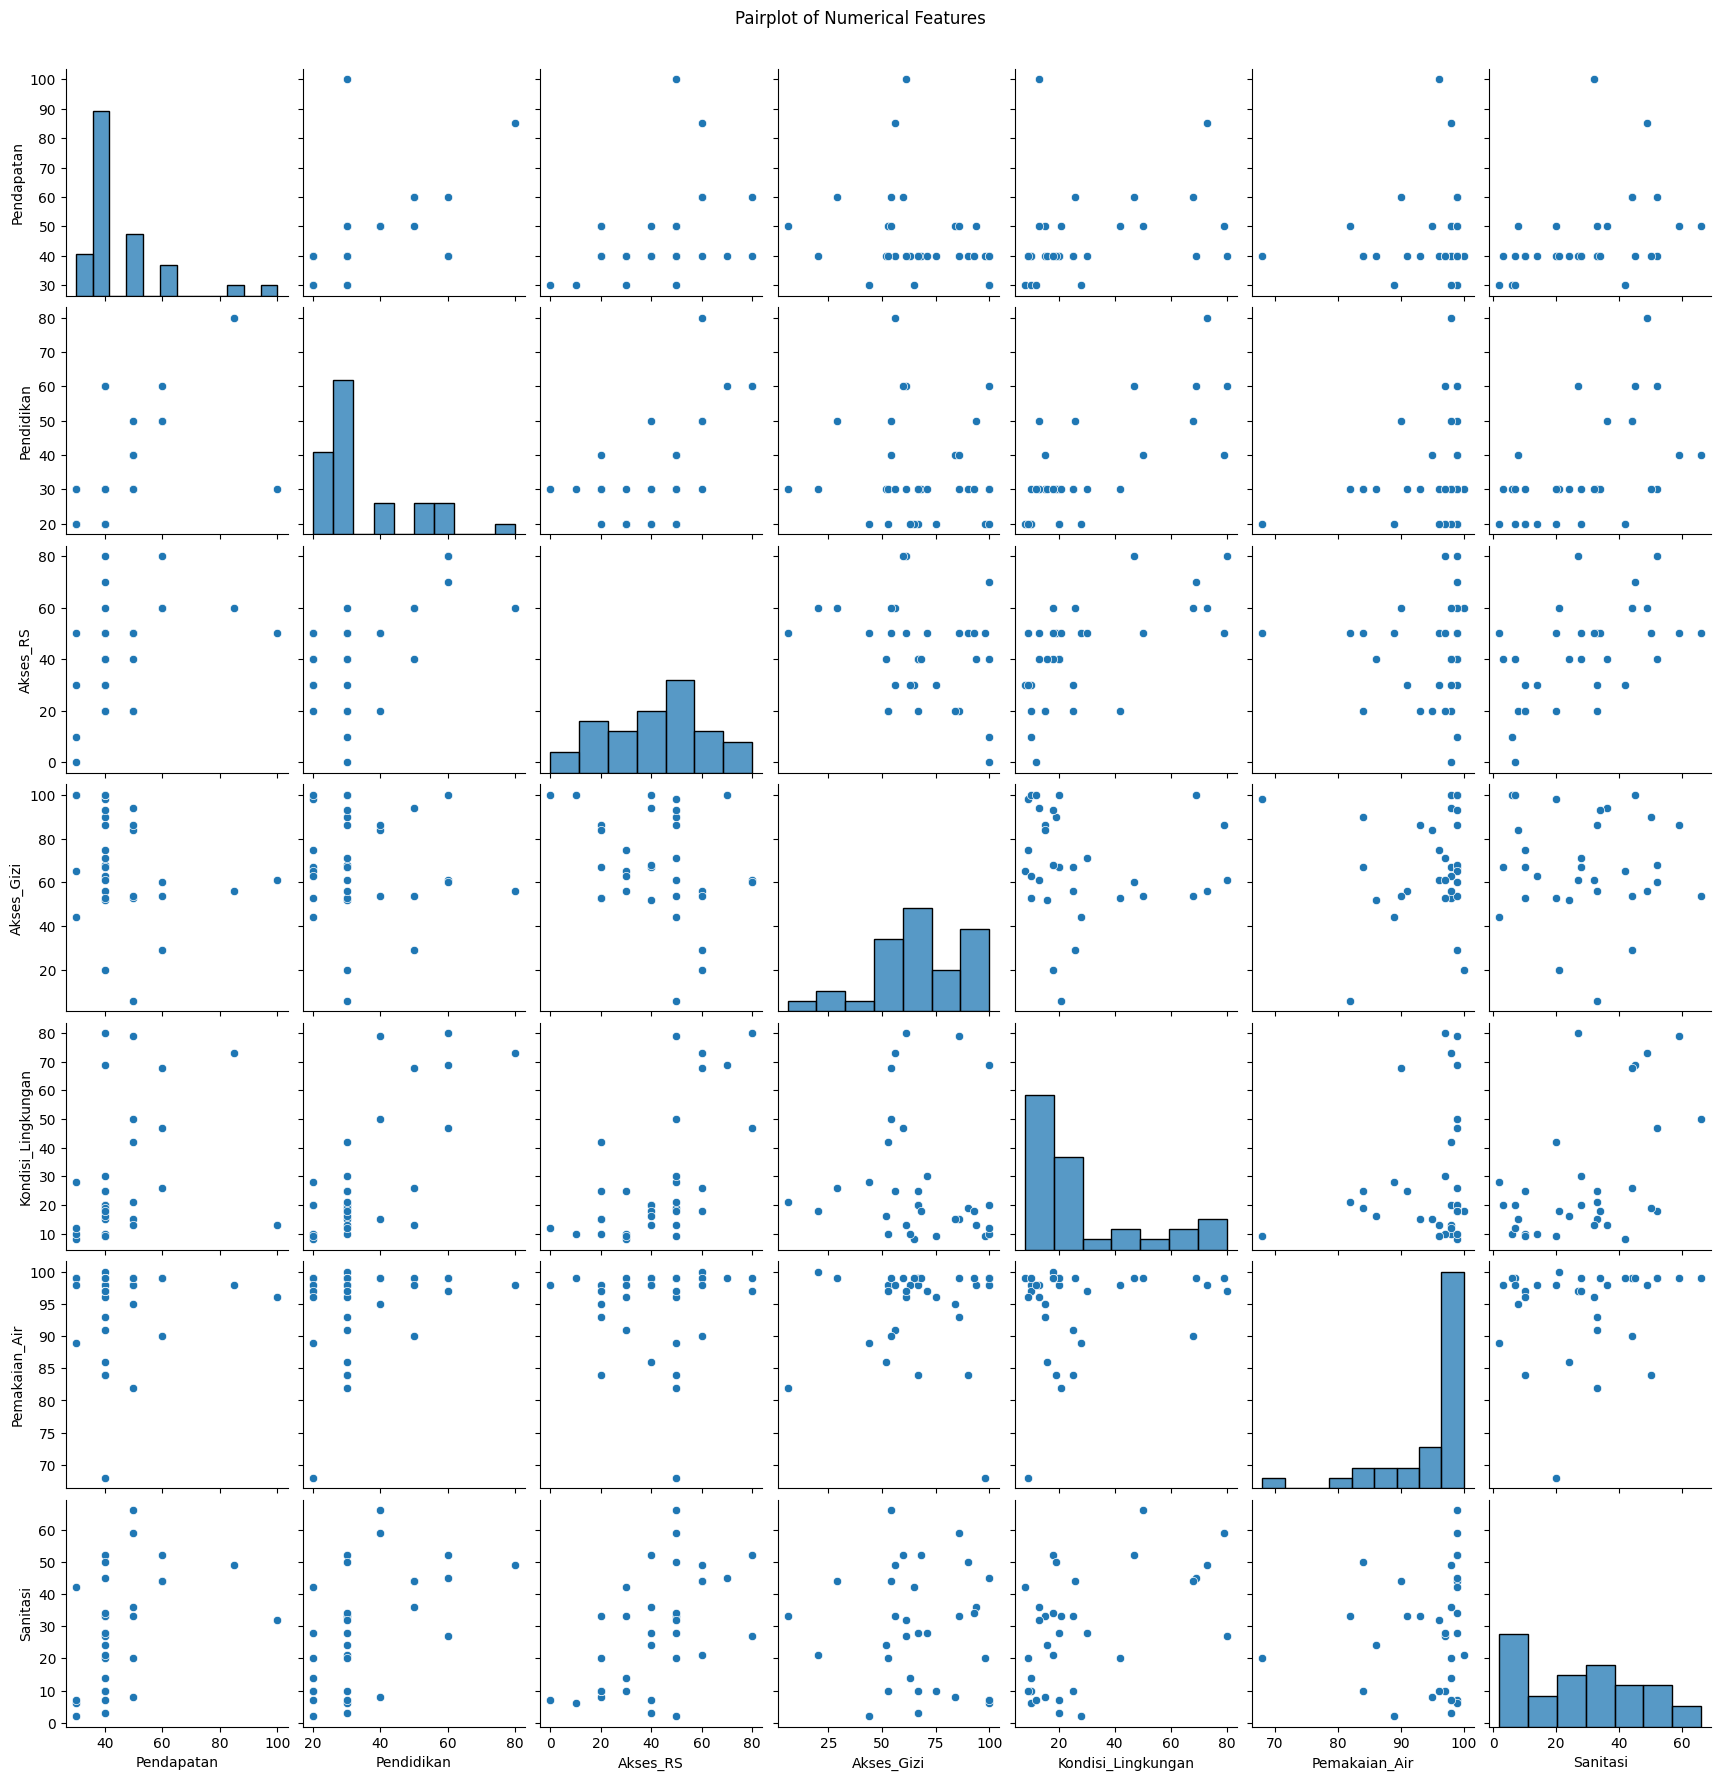

In [ ]:
sns.pairplot(df[num_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

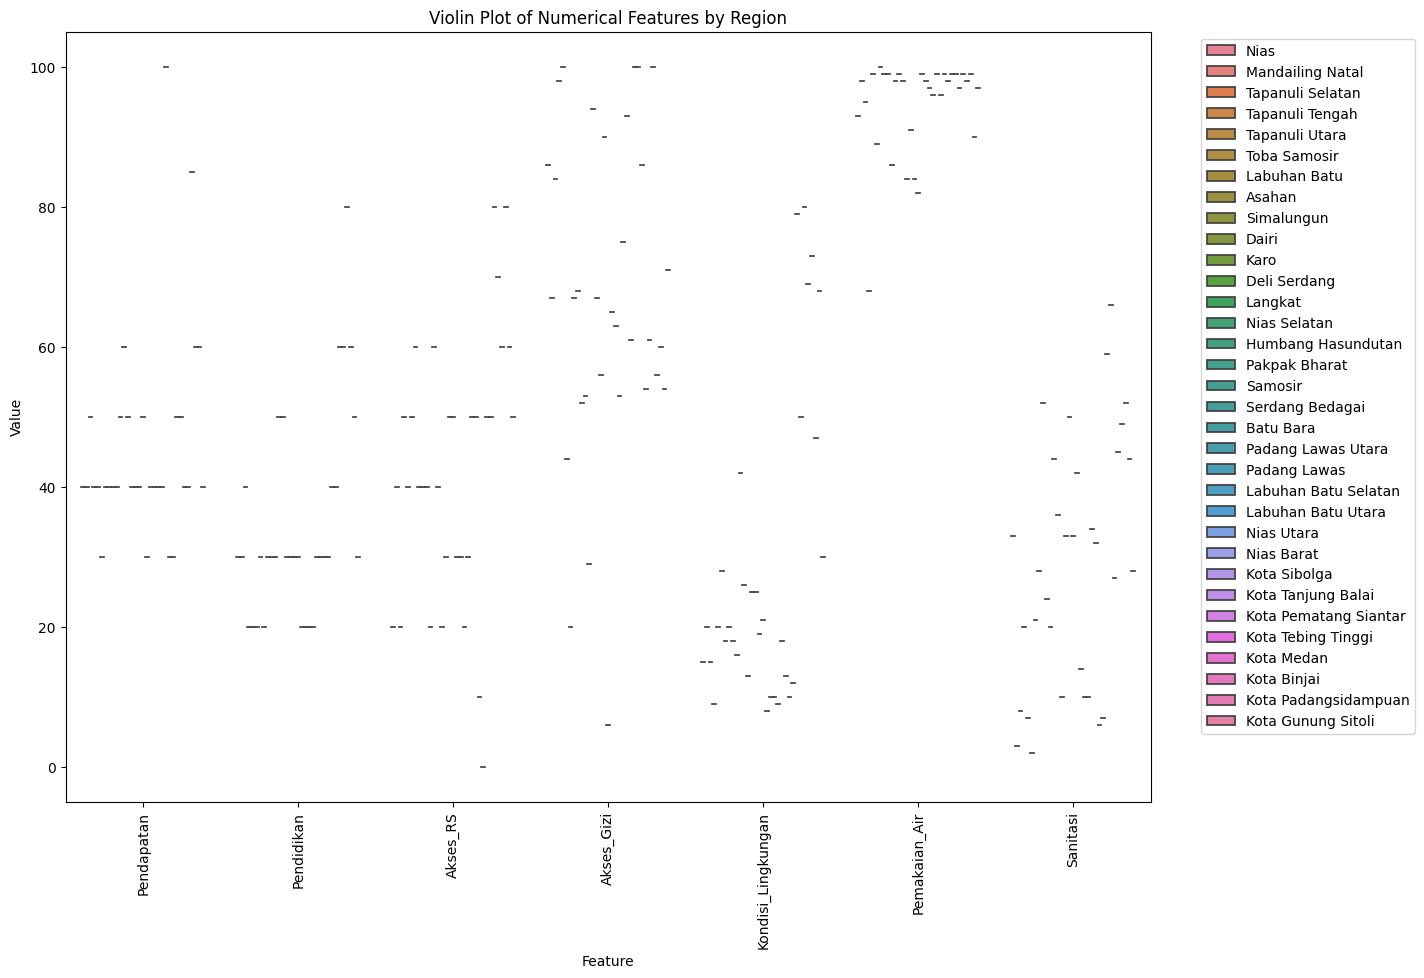

In [ ]:
# Violin plot for numerical features by region
plt.figure(figsize=(14, 10))
sns.violinplot(data=df.melt(id_vars=['Nama'], value_vars=num_features), x='variable', y='value', hue='Nama', split=True)
plt.title('Violin Plot of Numerical Features by Region')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


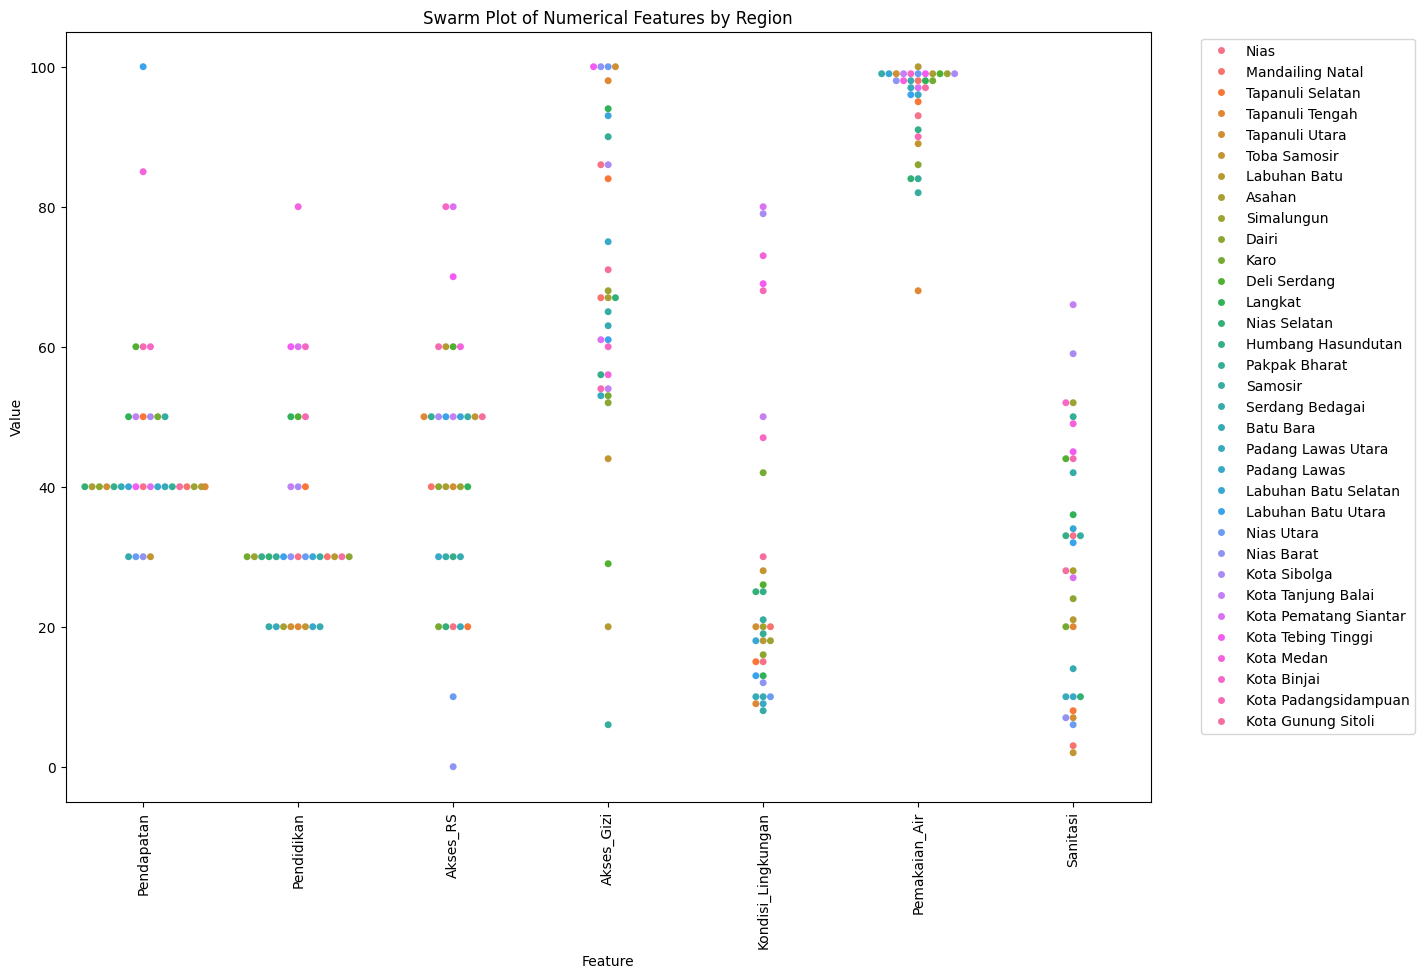

In [ ]:
# Swarm plot for numerical features by region
plt.figure(figsize=(14, 10))
sns.swarmplot(data=df.melt(id_vars=['Nama'], value_vars=num_features), x='variable', y='value', hue='Nama')
plt.title('Swarm Plot of Numerical Features by Region')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

<Axes: >

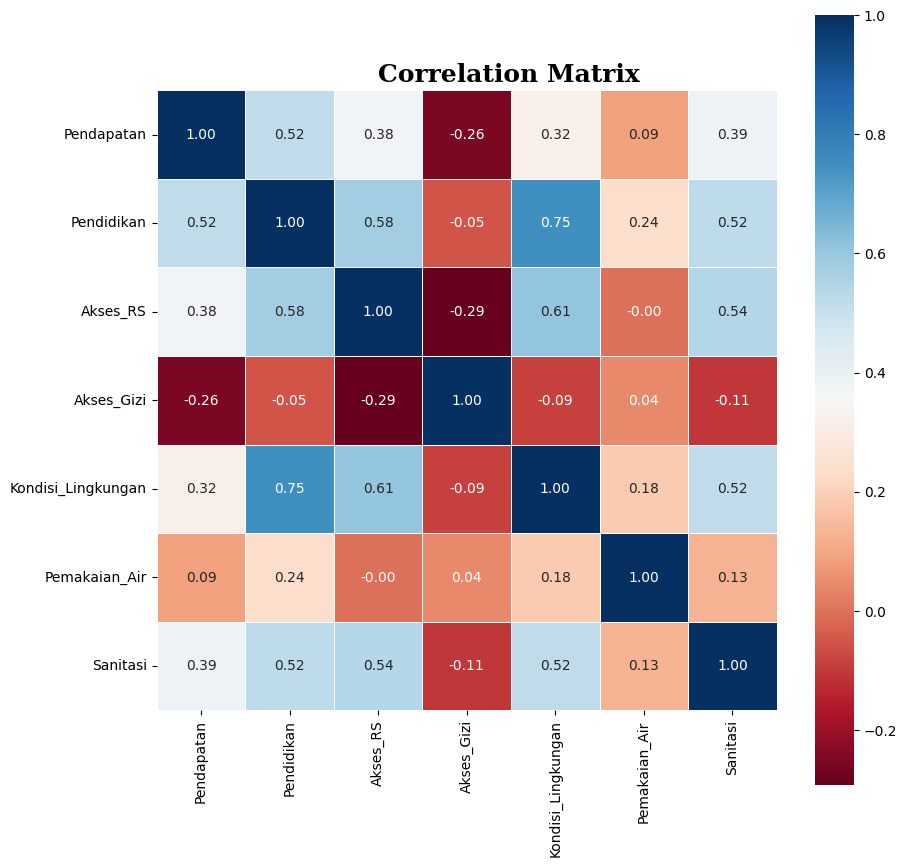

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (10, 10))

ax.text(2.5, -0.1, 'Correlation Matrix', fontsize = 18, fontweight = 'bold', fontfamily = 'serif')
sns.heatmap(numerical_data.corr(), annot = True, fmt = '.2f', cmap = 'RdBu',
            square = True, linewidth = 0.7, ax = ax)

In [ ]:
#Define the attribut in numpy array format
x = numerical_data.values
x

array([[ 40,  30,  20,  86,  15,  93,  33],
       [ 40,  30,  40,  67,  20,  98,   3],
       [ 50,  40,  20,  84,  15,  95,   8],
       [ 40,  20,  50,  98,   9,  68,  20],
       [ 40,  20,  40, 100,  20,  99,   7],
       [ 30,  20,  50,  44,  28,  89,   2],
       [ 40,  30,  60,  20,  18, 100,  21],
       [ 40,  20,  40,  67,  20,  99,  28],
       [ 40,  30,  40,  68,  18,  99,  52],
       [ 40,  30,  40,  52,  16,  86,  24],
       [ 50,  30,  20,  53,  42,  98,  20],
       [ 60,  50,  60,  29,  26,  99,  44],
       [ 50,  50,  40,  94,  13,  98,  36],
       [ 40,  30,  20,  67,  25,  84,  10],
       [ 40,  30,  30,  56,  25,  91,  33],
       [ 40,  30,  50,  90,  19,  84,  50],
       [ 50,  30,  50,   6,  21,  82,  33],
       [ 30,  20,  30,  65,   8,  99,  42],
       [ 40,  20,  30,  63,  10,  98,  14],
       [ 40,  20,  20,  53,  10,  97,  10],
       [ 40,  20,  30,  75,   9,  96,  10],
       [ 40,  30,  50,  93,  18,  99,  34],
       [100,  30,  50,  61,  13,

In [ ]:
#Scalling attribute using standar scaler or z-score
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.39088384, -0.31622777, -1.1927213 ,  0.79454914, -0.61507891,
        -0.23315237,  0.24273896],
       [-0.39088384, -0.31622777, -0.11437054, -0.0288927 , -0.38494735,
         0.49269934, -1.47377228],
       [ 0.30636842,  0.37947332, -1.1927213 ,  0.70787105, -0.61507891,
         0.05718832, -1.18768707],
       [-0.39088384, -1.01192885,  0.42480485,  1.31461767, -0.89123679,
        -3.86241091, -0.50108258],
       [-0.39088384, -1.01192885, -0.11437054,  1.40129576, -0.38494735,
         0.63786968, -1.24490412],
       [-1.0881361 , -1.01192885,  0.42480485, -1.02569071, -0.01673684,
        -0.81383373, -1.53098932],
       [-0.39088384, -0.31622777,  0.96398023, -2.06582777, -0.47699997,
         0.78304003, -0.44386553],
       [-0.39088384, -1.01192885, -0.11437054, -0.0288927 , -0.38494735,
         0.63786968, -0.04334624],
       [-0.39088384, -0.31622777, -0.11437054,  0.01444635, -0.47699997,
         0.63786968,  1.32986275],
       [-0.39088384, -0.3162

# DBSCAN

FIND THE BEST PARAMS (EPSION & MIN_SAMPLES) FOR DBSCAN ALGORTIHM

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import dsilhouette_score
import numpy as np

# Assuming x_scaled is your scaled data

best_score = -1
best_eps = None
best_min_samples = None
best_labels = None

for eps in np.arange(0.1, 100, 0.1):
    for min_samples in range(2, 100):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(x_scaled)

        # Check if there is more than one cluster to compute silhouette score
        if len(set(labels)) > 1:
            score = silhouette_score(x_scaled, labels)
        else:
            score = -1  # Silhouette score is not meaningful in this case

        # Update the best score and parameters if a better score is found
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples
            best_labels = labels

print(f'\nBest Silhouette Score: {best_score}')
print(f'Best eps: {best_eps}')
print(f'Best min_samples: {best_min_samples}')
print(f'Best cluster sizes: {np.bincount(best_labels + 1)}')


Best Silhouette Score: 0.3373307785561577
Best eps: 3.1
Best min_samples: 10
Best cluster sizes: [ 7 26]


DBSCAN WITH SKLEARN LIBRARY

In [ ]:
from sklearn.cluster import DBSCAN
dbscan =DBSCAN(eps=3.1, min_samples=10)  # Adjust eps and min_samples as needed
labels = dbscan.fit_predict(x_scaled)

In [ ]:
label=dbscan.labels_
label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1,  0])

In [ ]:
len(label)

33

DBSCAN WITH PYCLUSTERING LIBRARY

In [ ]:
from pyclustering.cluster.dbscan import dbscan

dbscan_instance = dbscan(x_scaled, 3.1, 10, True);
# cluster analysis
dbscan_instance.process();
# obtain results of clustering
clusters = dbscan_instance.get_clusters();
noise = dbscan_instance.get_noise();

print(clusters)
print(noise)
len(noise)

[[0, 15, 21, 32, 12, 2, 13, 10, 9, 14, 8, 4, 20, 19, 18, 7, 23, 17, 24, 1, 3, 26, 6, 11, 5, 16]]
[22, 25, 27, 28, 29, 30, 31]


7

In [ ]:
numerical_data.head(35)

,Pendapatan,Pendidikan,Akses_RS,Akses_Gizi,Kondisi_Lingkungan,Pemakaian_Air,Sanitasi
0,40,30,20,86,15,93,33
1,40,30,40,67,20,98,3
2,50,40,20,84,15,95,8
3,40,20,50,98,9,68,20
4,40,20,40,100,20,99,7
5,30,20,50,44,28,89,2
6,40,30,60,20,18,100,21
7,40,20,40,67,20,99,28
8,40,30,40,68,18,99,52
9,40,30,40,52,16,86,24


In [ ]:
df['Cluster'] = label
df.head(35)

,No,Nama,Lat,Lon,Pendapatan,Pendidikan,Akses_RS,Akses_Gizi,Kondisi_Lingkungan,Pemakaian_Air,Sanitasi,Cluster
0,1,Nias,1.03111,97.69182,40,30,20,86,15,93,33,0
1,2,Mandailing Natal,0.77681,99.37472,40,30,40,67,20,98,3,0
2,3,Tapanuli Selatan,1.48318,99.23489,50,40,20,84,15,95,8,0
3,4,Tapanuli Tengah,1.88577,98.64414,40,20,50,98,9,68,20,0
4,5,Tapanuli Utara,1.99580,99.05289,40,20,40,100,20,99,7,0
5,6,Toba Samosir,2.38280,99.31009,30,20,50,44,28,89,2,0
6,7,Labuhan Batu,2.36032,100.13924,40,30,60,20,18,100,21,0
7,8,Asahan,2.82077,99.56210,40,20,40,67,20,99,28,0
8,9,Simalungun,2.99445,98.80198,40,30,40,68,18,99,52,0
9,10,Dairi,2.87100,98.20738,40,30,40,52,16,86,24,0


In [ ]:
csv_path = '/content/clustered_DBSCAN.csv'
df.to_csv(csv_path, index=False)
print(f'DataFrame with cluster results saved to {csv_path}')

DataFrame with cluster results saved to /content/clustered_DBSCAN.csv


# XMEANS

XMEANS ONLY TEST IN PYCLUSTERING LIB BECAUSE SKLEARN DOESN'T HAVE ONE

In [ ]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES


# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(x_scaled, amount_initial_centers).initialize()

# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(x_scaled, initial_centers, 20)
xmeans_instance.process()

# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

# Print total sum of metric errors
print("Total WCE:", xmeans_instance.get_total_wce())
# Get total number of clusters
total_clusters = len(clusters)
print("Total number of clusters:", total_clusters)
print(clusters)

Total WCE: 148.84494504943402
Total number of clusters: 2
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 32], [11, 22, 25, 26, 27, 28, 29, 30, 31]]


In [ ]:
csv_path = '/content/clustered_x-means.csv'
df.to_csv(csv_path, index=False)
print(f'DataFrame with cluster results saved to {csv_path}')

COMPARE THE XMEANS RESULTS CLUSTER TO KMEANS AND HIERARCHY CLUSTERING (AGGLOMERATIVE)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
clustering1 = KMeans(n_clusters=2, n_init='auto', random_state=42).fit(x_scaled)
clusterings1 = clustering1.labels_
print(clusterings1)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1]


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering(n_clusters=2).fit(x_scaled)
clusterings = clustering.labels_
print(clusterings)

[1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1]


For the number of cluster = 2 we can see the result is very simmiliar, but i will use another popular technique called elbow method to find optimum number of cluster

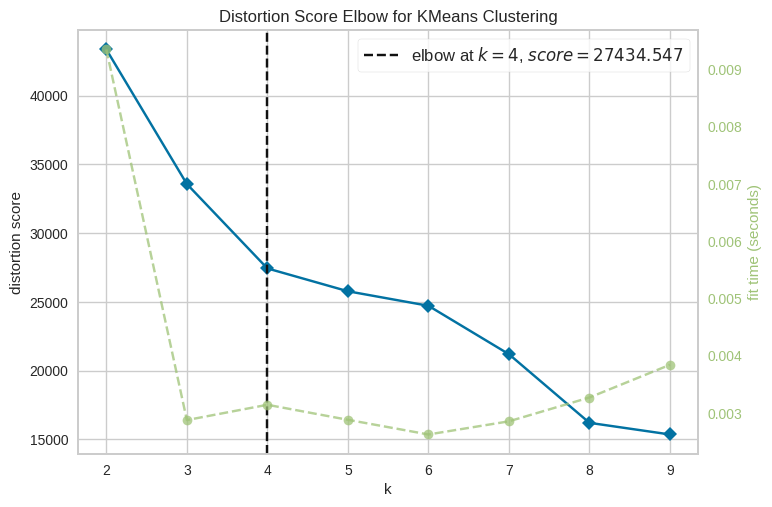

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
model = KMeans(random_state=42, init='k-means++', n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(x)
visualizer.show()
plt.show()

In [ ]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES


# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 4
initial_centers = kmeans_plusplus_initializer(x_scaled, amount_initial_centers).initialize()

# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(x_scaled, initial_centers, 5)
xmeans_instance.process()

# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

# Print total sum of metric errors
print("Total WCE:", xmeans_instance.get_total_wce())
# Get total number of clusters
total_clusters = len(clusters)S
print("Total number of clusters:", total_clusters)
print(clusters)

Total WCE: 110.66468540804823
Total number of clusters: 4
[[0, 1, 2, 4, 5, 7, 9, 10, 13, 14, 17, 18, 19, 20, 23, 24], [25, 26, 27, 28, 29, 30, 31], [3, 8, 12, 15, 21, 32], [6, 11, 16, 22]]


In [ ]:
# Create a list of cluster labels
cluster_labels = [-1] * len(x_scaled)
for cluster_id, cluster in enumerate(clusters):
    for data_index in cluster:
        cluster_labels[data_index] = cluster_id

# Add the cluster results to the DataFrame
df['Cluster'] = cluster_labels

In [ ]:
df.head(35)

,No,Nama,Lat,Lon,Pendapatan,Pendidikan,Akses_RS,Akses_Gizi,Kondisi_Lingkungan,Pemakaian_Air,Sanitasi,Cluster
0,1,Nias,1.03111,97.69182,40,30,20,86,15,93,33,0
1,2,Mandailing Natal,0.77681,99.37472,40,30,40,67,20,98,3,0
2,3,Tapanuli Selatan,1.48318,99.23489,50,40,20,84,15,95,8,0
3,4,Tapanuli Tengah,1.88577,98.64414,40,20,50,98,9,68,20,2
4,5,Tapanuli Utara,1.99580,99.05289,40,20,40,100,20,99,7,0
5,6,Toba Samosir,2.38280,99.31009,30,20,50,44,28,89,2,0
6,7,Labuhan Batu,2.36032,100.13924,40,30,60,20,18,100,21,3
7,8,Asahan,2.82077,99.56210,40,20,40,67,20,99,28,0
8,9,Simalungun,2.99445,98.80198,40,30,40,68,18,99,52,2
9,10,Dairi,2.87100,98.20738,40,30,40,52,16,86,24,0


In [ ]:
csv_path = '/content/clustered_xmeans4c.csv'
df.to_csv(csv_path, index=False)
print(f'DataFrame with cluster results saved to {csv_path}')

DataFrame with cluster results saved to /content/clustered_xmeans4c.csv


# Silhoutte method for determining number of clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

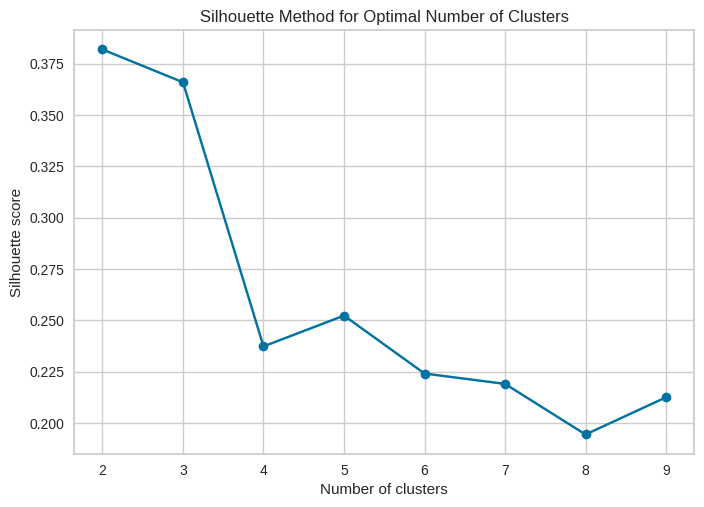

Optimal number of clusters: 2
Silhouette score: 0.2126168852392074


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
range_n_clusters = range(2, 10)

silhouette_scores = []

for n_clusters in range_n_clusters:
    # Initialize KMeans with different initial centers
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
    cluster_labels = kmeans.fit_predict(x)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(x, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.show()

# Get the optimal number of clusters
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print("Optimal number of clusters:", optimal_n_clusters)
print("Silhouette score:", silhouette_avg)